In [118]:
from __future__ import print_function
import cv2
import csv
import numpy as np
import librosa
import librosa.display
import wave
import os
import matplotlib.pyplot as plt


from ipywidgets import interactive
import ipywidgets as widgets

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import IPython.display as displayImg

In [124]:

### Image output resolution
RESOLUTION = 224
MainFile="../../AudioData/audio-cats-and-dogs/cats_dogs/train/dog/dog_barking_20.wav"

def f(SAMPLE_RATE, N_FFT,HOP_LENGTH,FMIN, FMAX,N_MELS):
    
  
   
    x ,sample_rate_in = librosa.load(MainFile,mono=True)
    audio_data = librosa.resample(x, sample_rate_in, SAMPLE_RATE)
    mel_spec_power = librosa.feature.melspectrogram(x, sr=SAMPLE_RATE, n_fft=N_FFT, 
                                                    hop_length=HOP_LENGTH, 
                                                    n_mels=N_MELS, power=3.0,
                                                   fmin=FMIN,fmax=FMAX)
    mel_spec_db = np.float32(librosa.power_to_db(mel_spec_power, ref=np.max))
    image = mel_spec_db; # convert to float
    image -= image.min() # ensure the minimal value is 0.0
    
    image /= image.max() # maximum value in image is now 1.0

    #img = np.stack((image,) * 3,-1)
    image*=256;
    img = image.astype(np.uint8)
    print(img.min(),img.max())
    colerPic = cv2.applyColorMap(img, cv2.COLORMAP_PINK)
    colerPic
    print(grayed.shape,grayed.min(),grayed.max())
    plt.imshow(colerPic)
   
    

    

interactive_plot = interactive(f, {"manual":True},SAMPLE_RATE=(16000, 48000,100), N_FFT=(128, 2048*2, 64),HOP_LENGTH=(128, 512, 16),FMIN=(0,300,5),FMAX=(300,40000,10),N_MELS=(10,300,10))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
#output.layout.width = '350px'
interactive_plot

interactive(children=(IntSlider(value=32000, description='SAMPLE_RATE', max=48000, min=16000, step=100), IntSl…

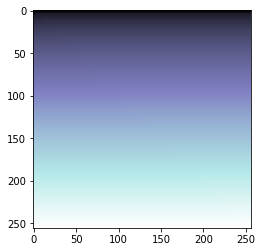

In [129]:
import numpy as np
from PIL import Image

# gradient between 0 and 1 for 256*256
array = np.linspace(0,255,256*256)

# reshape to 2d
mat = np.reshape(array,(256,256)).astype(np.uint8)
# Creates PIL image
colerPic = cv2.applyColorMap(mat, cv2.COLORMAP_PINK)
plt.imshow(colerPic)
   

In [131]:
colerPic.shape

(256, 256, 3)